In [41]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [42]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:], gray=True)

In [43]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.44)

In [44]:
lmbda = 8e-1
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                                'RelStopTol': 5e-3, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

In [45]:
b = tvl1.TVL1Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  1.13e+05  5.98e+04  6.67e+04  4.70e-01  1.18e+00  1.70e+00
   1  1.00e+05  6.41e+04  4.52e+04  3.50e-01  7.28e-01  1.70e+00
   2  1.00e+05  7.00e+04  3.77e+04  2.63e-01  4.96e-01  1.18e+00
   3  1.09e+05  8.59e+04  2.94e+04  3.10e-01  3.18e-01  8.58e-01
   4  1.17e+05  9.65e+04  2.54e+04  2.94e-01  2.31e-01  8.58e-01
   5  1.03e+05  8.92e+04  1.69e+04  2.20e-01  2.86e-01  9.67e-01
   6  8.44e+04  7.33e+04  1.39e+04  1.45e-01  2.44e-01  8.48e-01
   7  8.29e+04  7.22e+04  1.34e+04  1.65e-01  1.48e-01  6.53e-01
   8  8.50e+04  7.46e+04  1.29e+04  1.81e-01  9.37e-02  6.53e-01
   9  8.05e+04  7.29e+04  9.48e+03  1.40e-01  1.30e-01  9.09e-01
  10  7.47e+04  6.91e+04  6.97e+03  8.58e-02  1.32e-01  9.09e-01
  11  7.95e+04  7.33e+04  7.78e+03  9.28e-02  9.11e-02  7.33e-01
  12  8.42e+04  7.75e+04  8.36e+03  1.10e-01  5.42e-02  7.33e-01
  13  8.09e+04  7.55e+04 

 125  6.98e+04  6.66e+04  3.94e+03  2.21e-02  4.91e-02  1.16e+00
 126  7.29e+04  6.87e+04  5.26e+03  4.11e-02  2.93e-02  7.78e-01
 127  7.43e+04  6.97e+04  5.69e+03  4.77e-02  1.16e-02  9.22e-01
 128  7.27e+04  6.87e+04  5.04e+03  3.73e-02  4.81e-02  1.87e+00
 129  7.03e+04  6.70e+04  4.14e+03  2.23e-02  5.87e-02  1.65e+00
 130  7.06e+04  6.70e+04  4.54e+03  3.08e-02  4.58e-02  1.02e+00
 131  7.34e+04  6.88e+04  5.77e+03  4.61e-02  2.43e-02  8.34e-01
 132  7.37e+04  6.91e+04  5.76e+03  4.64e-02  1.93e-02  1.15e+00
 133  7.22e+04  6.83e+04  4.91e+03  3.41e-02  5.05e-02  1.78e+00
 134  6.99e+04  6.67e+04  4.00e+03  2.08e-02  5.65e-02  1.46e+00
 135  7.15e+04  6.77e+04  4.73e+03  3.41e-02  4.04e-02  8.86e-01
 136  7.42e+04  6.95e+04  5.76e+03  4.70e-02  1.62e-02  8.86e-01
 137  7.33e+04  6.91e+04  5.29e+03  4.17e-02  3.28e-02  1.51e+00
 138  7.12e+04  6.76e+04  4.43e+03  2.64e-02  5.32e-02  1.70e+00
 139  6.97e+04  6.64e+04  4.08e+03  2.24e-02  4.74e-02  1.20e+00
 140  7.22e+04  6.81e+04 

In [46]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time: 316.53 s
Noisy image PSNR:     6.35 dB
Denoised image PSNR: 29.21 dB


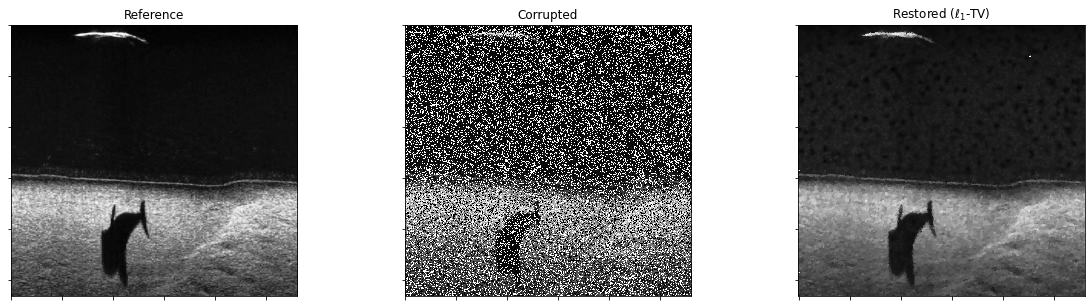

In [47]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

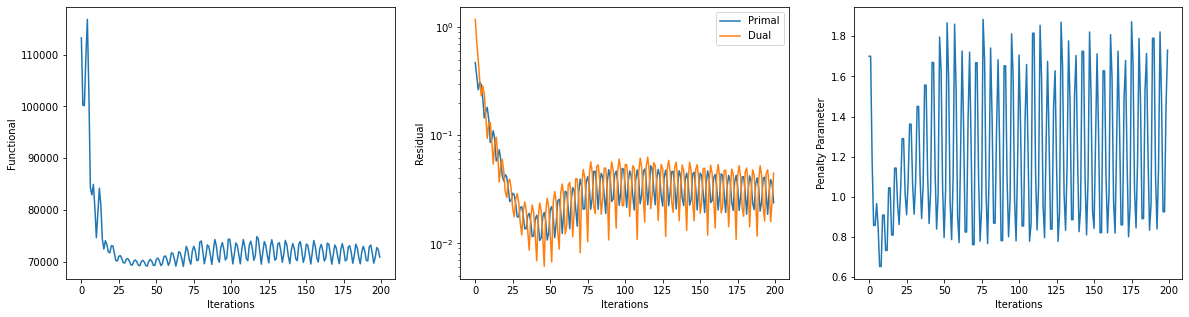

In [48]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [49]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.8317011348017629
